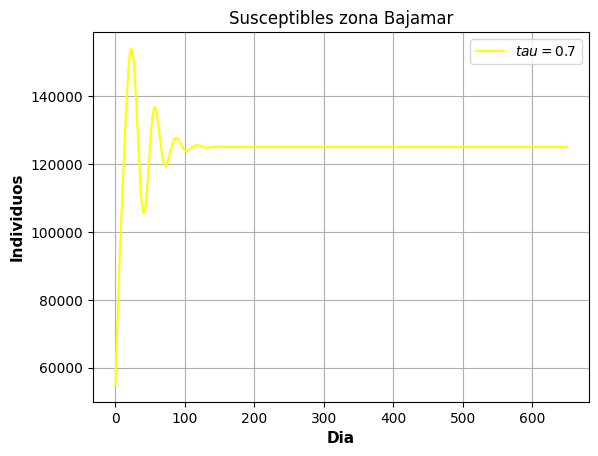

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def modelo_malaria(R,t):
    S = R[0]
    E = R[1]
    I = R[2]
    Sm = R[3]
    Im  = R[4]
    Su = R[5]
    Eu = R[8]
    Smu = R[7]
    Imu  = R[8]

    Totalh = 89586
    Iu = Totalh - Su-Eu

    alfa1 = 0.3
    sigma = 0.558
    mu = 0.002 ##
    c1 = 0.25
    b1 = 0.883
    beta = 0.42
    alfa2 = 0.15
    mu2 = 0.05 ##
    c2 = 0.25
    b2 = 0.3

    #migraciones

    P = 0.15
    tao = 0.7
    etha = 0.15

    dSdt = beta*I - (S*Im*alfa1*c1/(Sm+Im))+etha*Su-tao*P*S
    dEdt = (S*Im*alfa1*c1/(Sm+Im)) - sigma*E -tao*P*E + etha*Eu
    dIdt = sigma*E - beta*I + sigma*Eu
    dSmdt = mu*(Im+Sm) - (Sm*I*c1*b1/(S+E+I))
    dImdt = -mu*Im + (Sm*I*c1*b1/(S+E+I))
    dSudt = -(Su*Imu*alfa2*c2/(Smu+Imu)) + tao*P*S - etha*Su
    dEudt =  (Su*Imu*alfa2*c2/(Smu+Imu)) + tao*P*E - etha*Eu
    dSmudt = mu2*(Imu+Smu) - (Smu*Iu*c2*b2/(Su+Eu+Iu))
    dImudt = -mu2*(Imu) + (Smu*Iu*c2*b2/(Su+Eu+Iu))

    return(dSdt,dEdt,dIdt,dSmdt,dImdt,dSudt,dEudt,dSmudt,dImudt)
##
t1 = np.arange(0,650,1)

"vallores iniciales en bajamar"
Nh = 54908
Nm = 200000
S = Nh
E = 0
I = Nh - S - E
Sm = Nm*0.8
Im = Nm - Sm
"valores iniciales urbano"
Nhu = 89586
Nmu = 100000
Su = Nhu
Eu = 0
Smu = Nmu*0.9
Imu = Nmu - Smu

Rom = [S,E,I,Sm,Im,Su,Eu,Smu,Imu]

solucion_m = odeint(modelo_malaria,Rom,t1)
##
plt.plot(t1,solucion_m[:,0],color = "yellow", label = "$tau = 0.7$")
#plt.plot(t1,solucion_m[:,8],color = "red", label = "Infectados")
#plt.plot(t1,solucion_m[:,2],color = "green", label = "Infectados")
#plt.plot(t,solucion[:,3],color = "blue", label = "Sm")
#plt.plot(t,solucion[:,4], label = "Im")
plt.xlabel("Dia",weight = "bold",fontsize = 11)
plt.ylabel("Individuos",weight = "bold",fontsize = 11)
plt.title("Susceptibles zona Bajamar")
plt.grid()
plt.legend()